In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Practice Exam







---
# Problem 1: Determination of Activation Energy  (20 pts)
---
It is often assumed that the temperature dependence of a chemical rate constant, $k$, takes the form given by the Arrhenius equation:

$$ k(T) = k_0 e^{-E/RT} $$

where E is the activation energy, $k_0$ is the pre-exponential factor, R is the universal gas constant, and T is temperature.


A. (10 pts.) You are given a set of data below, corresponding to observed rate constant k ($min^{-1}$) measured at various temperature T (Kelvin). The rate data can be logarithm transformed, giving the following equation:

$$ ln k(T) = ln k_0 - \frac{E}{RT} $$

Plot the data $lnk(T)$ vs. $1/T$.

In [ ]:
k = [0.068, 0.373, 0.614, 1.353, 2.705, 5.569, 10.723, 19.847, 35.691]
T = [423., 435.5, 448., 460.5, 473., 485.5, 498., 510.5, 523.]

In [ ]:
lnk = np.log(k)
T_inv = 1./np.array(T)

Text(0, 0.5, '$ln k$')

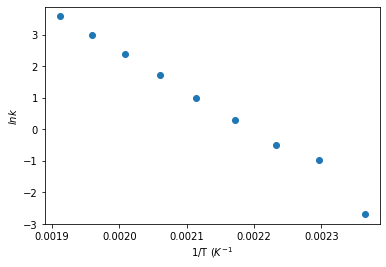

In [ ]:
plt.scatter(T_inv, lnk)
plt.xlabel('1/T ($K^{-1}$')
plt.ylabel('$ln k$')

B. (10 pts.) Determine the activation energy E in kcal/mol and $k_0$ ($min^{-1}$).

E: 26.001955024017207 kcal/mol; k0: 2793834732184.554 min-1


Text(0, 0.5, '$ln k$')

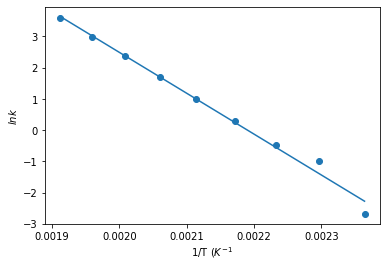

In [ ]:
R = 1.9872e-3
z = np.polyfit(T_inv, lnk, deg=1)
E = z[0] * -R
k0 = np.exp(z[1])
print("E: {} kcal/mol; k0: {} min-1".format(E, k0))
plt.scatter(T_inv, lnk)
plt.plot(T_inv, np.poly1d(z)(T_inv))
plt.xlabel('1/T ($K^{-1}$')
plt.ylabel('$ln k$')

---
# Problem 2: Equilibrium Conversion in an Isomerization Reaction  (20 pts)
---
Consider the isomerization reactions:

$$ A \longleftrightarrow B \longleftrightarrow C \longleftrightarrow A$$

with forward reaction rates $k_1$, $k_3$, and $k_5$, respectively, as written; reverse reaction rates $k_2$, $k_4$, $k_6$, as written. First order kinetics leads to the following system of ordinary differential equations:

$$ \frac{dc_A}{dt} = -k_1 c_A + k_2 c_B + k_5 c_C - k_6 c_A$$
$$ \frac{dc_B}{dt} = k_1 c_A - k_2 c_B - k_3 c_B + k_4 c_C $$
$$ \frac{dc_C}{dt} = k_3 c_B - k_4 c_C - k_5 c_C + k_6 c_A $$

We further assume the reactions occur in a isothermal, isobaric closed system and that we have reached steady-state such that $dc_i/dt$ = 0 for i = A, B, C. We add an additional equation for an overall mass balance on our system to reach the following set of linear equations:

$$ 0 = -k_1 c_A + k_2 c_B + k_5 c_C - k_6 c_A$$
$$ 0 = k_1 c_A - k_2 c_B - k_3 c_B + k_4 c_C $$
$$ 0 = k_3 c_B - k_4 c_C - k_5 c_C + k_6 c_A $$
$$ c_{A0} + c_{B0} + c_{C0} = c_A + c_B + c_C $$ 

In [ ]:
# Assume the following set of parameters:
k1 = 1 # /s 
k2 = 0 # /s
k3 = 2 # /s
k4 = 3 # /s
k5 = 0 # /s
k6 = 3 # /s
ca0 = 1 # mol/L
cb0 = 0 # mol/L
cc0 = 0 # mol/L

A. (10 pts.) Cast the set of equations describing this reaction system into the form $Ax = b$. Print out the matrix $A$ and vector $b$.

In [ ]:
a1 = [-k1-k6,k2,k5]
a2 = [k1,-k2-k3,k4]
a3 = [k6,k3,-k4-k5]
a4 = [1,1,1]
b = np.array([0, 0, 0, ca0+cb0+cc0])
A = np.stack([a1,a2,a3,a4], axis=0)
print(A.shape, b.shape)
print(A, b)

(4, 3) (4,)
[[-4  0  0]
 [ 1 -2  3]
 [ 3  2 -3]
 [ 1  1  1]] [0 0 0 1]


B. (10 pts.) Determine the equilibrium, steady-state concentrations $c_A$, $c_B$, and $c_C$.

In [ ]:
x, res, rank, s = np.linalg.lstsq(A, b)
print("cA: {} mol/L; cB: {} mol/L; cC: {} mol/L".format(*list(x)))

cA: 8.731780504461302e-16 mol/L; cB: 0.5999999999999994 mol/L; cC: 0.40000000000000135 mol/L


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  """Entry point for launching an IPython kernel.


---
# Problem 3: Vapor-Liquid Equilibrium (20 pts)
---
At vapor-liquid equilibrium, the mole fractions of species $i$ in the liquid phase and vapor phase can be determined using the thermodynamic relation, Raoult's Law:

$$ y_i P = x_i P_i^{sat}, \quad i = 1..N $$

where $x_i$ and $y_i$ are the mole fraction of species $i$ in the liquid phase and vapor phase, respectively, P is total system pressure, and $P_i^{sat}$ the vapor pressure of pure species $i$ at the temperature of the system $T$ fpr each species i in the system of interest. The vapor pressure $P_i^{sat}$ is typically given by the Antoine equation:

$$ P_i^{sat}(T) [kPa] = A - \frac{B}{T[^\circ C] + C} $$

where A, B, and C are species-dependent constants.

Consider a binary mixture of acetonitrile(1) and nitromethane(2) with Antoine parameters given below.

In [ ]:
d1 = {'A': 14.2724, 'B': 2945.47, 'C': 224.0} # acetonitrile
d2 = {'A': 14.2043, 'B': 2972.64, 'C': 209.0} # nitromethane

In [ ]:
def antoine(T, a, b, c):
  return np.exp(a - b/(T+c))

from scipy.optimize import fsolve

B. (10 pts) Bubble-point P calculation: Determine $y_1$, $y_2$ and P given $x_1$, $x_2$, and T.

In [ ]:
x1 = 0.2
x2 = 0.8 # x2 = 1 - x1
T = 75.0 # deg C

def f(y1, P):
  # Raoult's law equation 1 residual
  return y1*P - x1*antoine(T, d1['A'], d1['B'], d1['C'])

def g(y1, P):
  # Raoult's law equation 2 residual
  return (1-y1)*P - x2*antoine(T, d2['A'], d2['B'], d2['C'])

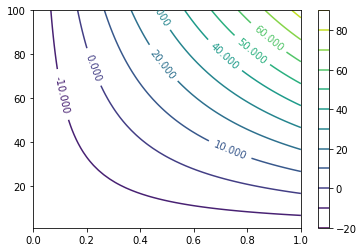

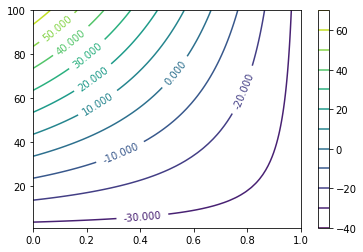

In [ ]:
y1 = np.linspace(0, 1)
P = np.linspace(1, 100)
XX, YY = np.meshgrid(y1, P)
fig, ax = plt.subplots()
pos = plt.contour(XX, YY, f(XX, YY), 10)
fig.colorbar(pos, ax=ax)
ax.clabel(pos, pos.levels, inline=True, fontsize=10)
plt.show()
plt.close()
fig, ax = plt.subplots()
pos = plt.contour(XX, YY, g(XX, YY), 10)
fig.colorbar(pos, ax=ax)
ax.clabel(pos, pos.levels, inline=True, fontsize=10)
plt.show()
plt.close()

In [ ]:
def func(X):
    x, y = X
    return [f(x, y), g(x, y)]

soln = fsolve(func, [.4, 50])
print("y1: {}; y2: {}; P: {} kPa".format(soln[0], 1-soln[0], soln[1]))

y1: 0.33131969036410874; y2: 0.6686803096358913; P: 50.227535449923536 kPa


A. (10 pts) Dew-point T calculation: Determine $x_1$, $x_2$, and T given $y_1$, $y_2$, and P.

In [ ]:
y1 = 0.8484
y2 = 0.1516 # y2 = 1 - y1
P = 70 # kPa

def f(x1, T):
  # Raoult's law equation 1 residual
  return y1*P - x1*antoine(T, d1['A'], d1['B'], d1['C'])

def g(x1, T):
  # Raoult's law equation 2 residual
  return y2*P - (1-x1)*antoine(T, d2['A'], d2['B'], d2['C'])

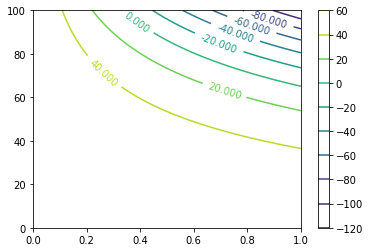

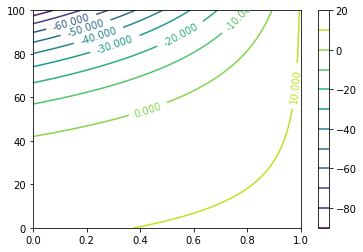

In [ ]:
x1 = np.linspace(0, 1)
T = np.linspace(0, 100)
XX, YY = np.meshgrid(x1, T)
fig, ax = plt.subplots()
pos = plt.contour(XX, YY, f(XX, YY), 10)
fig.colorbar(pos, ax=ax)
ax.clabel(pos, pos.levels, inline=True, fontsize=10)
plt.show()
plt.close()
fig, ax = plt.subplots()
pos = plt.contour(XX, YY, g(XX, YY), 10)
fig.colorbar(pos, ax=ax)
ax.clabel(pos, pos.levels, inline=True, fontsize=10)
plt.show()
plt.close()

In [ ]:
def func(X):
    x, y = X
    return [f(x, y), g(x, y)]

soln = fsolve(func, [.7, 70])
print("x1: {}; x2: {}; T: {} degC".format(soln[0], 1-soln[0], soln[1]))

x1: 0.737711659739178; x2: 0.26228834026082204; T: 74.00066142460152 degC


---
# Problem 4: Plug-Flow Tubular Reactor (20 pts)
---
We consider a plug-flow tubular reactor of length L. We first assume the tube has diameter D and also that the density does not vary with position. In this case, the linear fluid velocity throught the tube $u$ is equal to the volumetric flow rate $v$ divided by the cross-sectional area $A_t$ = $\frac{\pi D^2}{4}$,

$$ u = \frac{v}{A_t} = \frac{4v}{\pi D^2} $$

A steady-state shell balance on some species $j$ in the element of length $dz$ between $z$ and $z+dz$ gives the design equation:

$$ u \frac{dC_j}{dz} = \nu_j r $$

where $C_j$ is the molar concentration of species $j$, and $\nu_j$ is the stoichiometric coefficient of species $j$ in a reaction with rate $r$.



A. (10 pts) Consider the irreversible reaction,

$$ A \rightarrow B $$
$$ r = k C_A $$

If k = 0.5 $min^{-1}$, $C_{A0}$ = 2 mol/liter, D = 2 cm, and $\nu$ = 4 liter/min, determine the concentration of species A and B and plot as a function of reactor length L. Consider L between 1 m and 100 m.

$$\frac{dC_A}{dz} = \frac{-k C_A}{u} $$
$$\frac{dC_B}{dz} = \frac{k C_A}{u} $$ 

Text(0.5, 0, 'Reactor Length (m)')

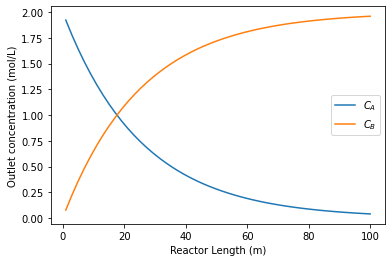

In [ ]:
from scipy.integrate import solve_ivp

cm_to_m = 0.01
L_to_cm3 = 1000.
k = 0.5 # min-1
Ca0 = 2.0 # mol/L
D = 2. # cm
v = 4.0*L_to_cm3 # cm**3/min
u = (4*v)/(np.pi*D**2) # cm/min

def f(t, y):
  ca, cb = y
  return [-k/u*ca,k/u*ca]

t_span = [0., 10000.] # L (cm)
y0 = [Ca0, 0.0] # Ca0 (mol/L)
t_eval = np.linspace(100., 10000.) # L (cm)

sol = solve_ivp(f, t_span, y0, t_eval=t_eval)
ca, cb = sol.y
z = sol.t
z_m = z * cm_to_m # convert length from cm to m

plt.plot(z_m, ca, label='$C_A$')
plt.plot(z_m, cb, label='$C_B$')
plt.legend()
plt.ylabel("Outlet concentration (mol/L)")
plt.xlabel("Reactor Length (m)")

B. (10 pts) For the scenario described above, determine the reactor length L required to reach 90% conversion.

$$ \int_{C_{A0}}^{0.1*C_{A0}} \frac{dC_A}{C_A} = -\frac{k}{u} \int_0^L dz $$
$$ L = -\frac{u}{k} \int_{C_{A0}}^{0.1*C_{A0}} \frac{dC_A}{C_A} $$

In [ ]:
from scipy.integrate import quad

def integrand(x):
  return 1./x

integral, err = quad(integrand, Ca0, 0.1*Ca0)
L = -u/k*integral * cm_to_m # m
print("Reactor length: {} m".format(L))

Reactor length: 58.63484791035441 m
